# Mean

### Gemiddelde via Pandas

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_pandas = pd.read_csv('mammals.csv')
df_pandas.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [69]:
np.mean(df_pandas['total_sleep'])

10.532758620689652

### Gemiddelde via polars dataframe

In [1]:
import polars as pl
df = pl.DataFrame(
    {
    'name':['Sheetah','Owl monkey','Mountain beaver','Greater short-t','dog'],
    'sleep_total':[12.1,17,14.4,14.9,4]
    }
)
df

name,sleep_total
str,f64
"""Sheetah""",12.1
"""Owl monkey""",17.0
"""Mountain beave…",14.4
"""Greater short-…",14.9
"""dog""",4.0


In [2]:
import numpy as np
dierenslaap = [12.1,17,14.4,14.9,4]

### Gemiddelde via NumPy

In [3]:
np.mean(dierenslaap)

12.48

In [4]:
# Polars mean

In [5]:
df.select([pl.col('sleep_total').mean().alias('Mean')])

Mean
f64
12.48


# Median
### De waarde waar 50% van de data lager is dan deze waarde en waarvan 50% hoger is dan deze waarde

### Median via Pandas

In [55]:
msleep = df_pandas['total_sleep'].sort_values()
msleep

52     2.6
28     2.9
13     3.1
0      3.3
21     3.8
      ... 
32    19.9
20     NaN
30     NaN
40     NaN
61     NaN
Name: total_sleep, Length: 62, dtype: float64

In [60]:
msleep.median()

10.45

### Median via NumPy

In [6]:
cijfers = [1.9,2.7,19.4,2.9,3.0,19.9,3.1,18,18.1,19.7]
np.median(cijfers)

10.55

### Median via Polars

In [7]:
import polars as pl
df_median = pl.DataFrame(
    {
    'name':['Sheetah','Owl monkey','Mountain beaver','Greater short-t','dog','Giraffe','Unicorn','Rhino','Crocodile','Mouse'],
    'cijfers':[1.9,2.7,19.4,2.9,3.0,19.9,3.1,18,18.1,19.7]
    }
)
df_median

name,cijfers
str,f64
"""Sheetah""",1.9
"""Owl monkey""",2.7
"""Mountain beave…",19.4
"""Greater short-…",2.9
"""dog""",3.0
"""Giraffe""",19.9
"""Unicorn""",3.1
"""Rhino""",18.0
"""Crocodile""",18.1


In [8]:
df_median.median()

name,cijfers
str,f64
null,10.55


### Median selectie kolom bij meerdere kolommen

In [9]:
df_median.select([pl.col('cijfers').median().alias('Median Cijfers')])

Median Cijfers
f64
10.55


# Mode
### Waarde die het meeste voorkomt. Most Frequent value
### We kunnen tellen hoevaak elk getal voor komt

In [10]:
import polars as pl
df_mode = pl.DataFrame(
    {
     'sleep_total':[12.5,14.9,12.5,11,12.5,17,12.5,8.4,10.1,14.9,11,14.3,10.1,10.1,8.4]
    }
)
df_mode.head(3)

sleep_total
f64
12.5
14.9
12.5


In [11]:
df_mode.select([
    pl.col('sleep_total').value_counts()
]) # Hieronder zien we hoe vaak elke waarde voor komt

sleep_total
struct[2]
"{11.0,2}"
"{17.0,1}"
"{10.1,3}"
"{12.5,4}"
"{14.9,2}"
"{14.3,1}"
"{8.4,2}"


### Welk getal komt het meeste voor: Als er 2 of meer getallen zijn die het meest voor komen dan worden deze getallen beiden genoemd.

In [12]:
df_mode.select([pl.col('sleep_total').mode().alias('Mode sleep total')])

Mode sleep total
f64
12.5


### Met de statistics librarie

In [13]:
sleep_total = [12.5,14.9,12.5,11,12.5,17,12.5,8.4,10.1,14.9,11,14.3,10.1,10.1,8.4]
import statistics
statistics.mode(sleep_total)

12.5

# Extra informatie

In [15]:
import matplotlib.pyplot as plt

In [28]:
import polars as pl
df = pl.DataFrame(
    {
    'name':['Sheetah','Owl monkey','Mountain beaver','Greater short-t','dog'],
    'sleep_total':[12.1,17,14.4,14.9,4]
    }
)
df

name,sleep_total
str,f64
"""Sheetah""",12.1
"""Owl monkey""",17.0
"""Mountain beave…",14.4
"""Greater short-…",14.9
"""dog""",4.0


In [44]:
# https://www.statology.org/seaborn-figure-size/

CPU times: total: 15.6 ms
Wall time: 77.1 ms


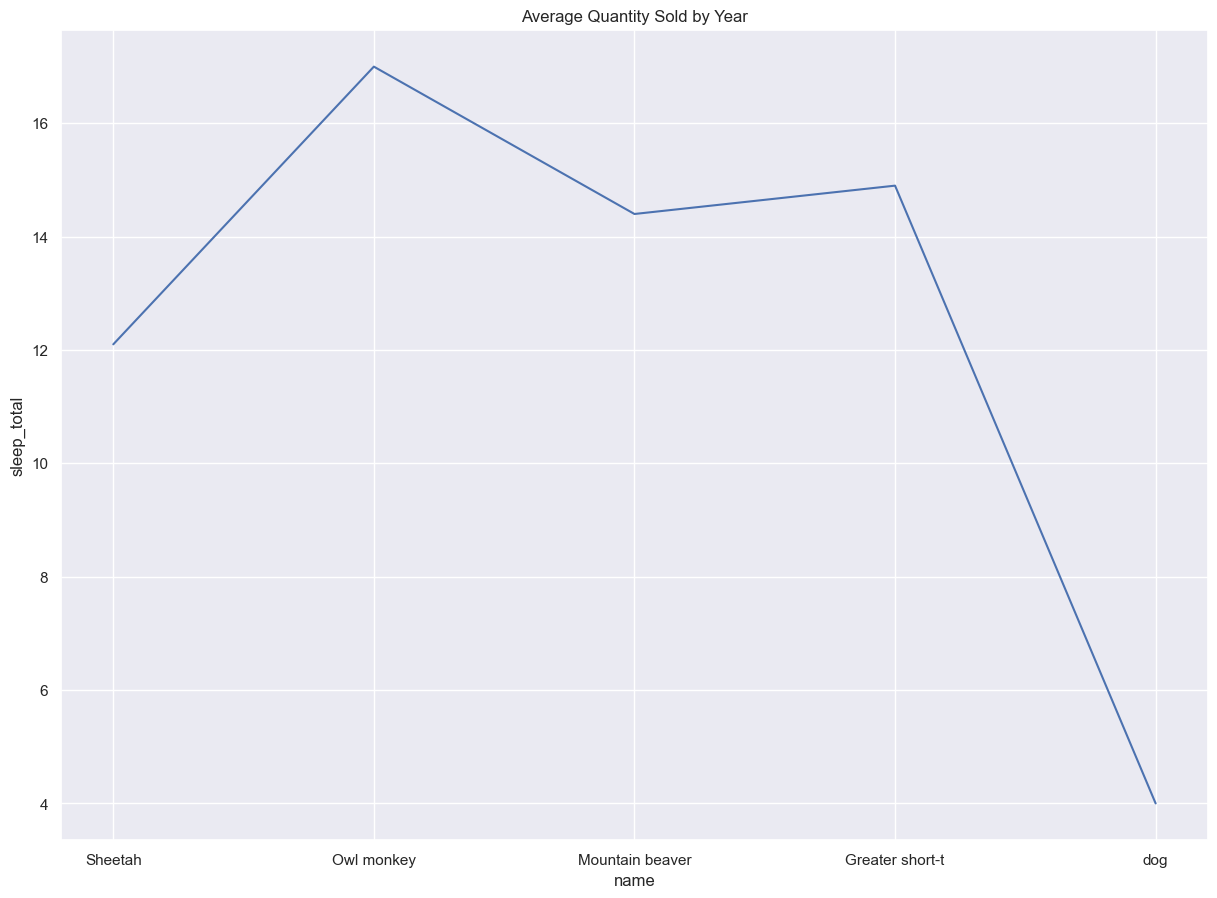

In [38]:

%%time
import seaborn as sns
sns.lineplot(data=df,
            x='name',
            y='sleep_total').set(title='Average Quantity Sold by Year')
sns.set(rc={'figure.figsize':(11,8)})

<Axes: xlabel='var1', ylabel='var2'>

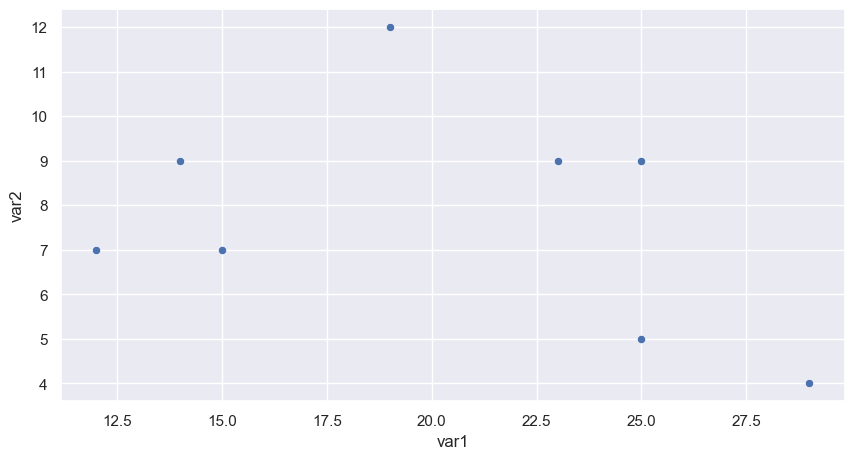

In [42]:
import pandas as pd
import seaborn as sns

#create data
df = pd.DataFrame({"var1": [25, 12, 15, 14, 19, 23, 25, 29],
                   "var2": [5, 7, 7, 9, 12, 9, 9, 4],
                   "var3": [11, 8, 10, 6, 6, 5, 9, 12]})

#define figure size
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

#display scatterplot
sns.scatterplot(data=df, x="var1", y="var2")